# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#откроем файл
try:

    df = pd.read_csv('/datasets/real_estate_data.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')
#взглянем на данные
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видим, что столбцы разделены '\t', укажем сепаратор

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
#
pd.set_option('display.max_columns', 50) 
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#посмотрим значения
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
#посмотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Видим, что имеется большое количество пропусков, несоответствие типов данных.

## Предобработка данных

### Изучаем данные на предмет пропусков и аномалий

Пробежимся по каждому столбцу

In [7]:
df['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

'total_images'(количетство фотографий) - 1059 строк имеют значения "0" доля значительная. 
Возможная причина появления: отсутствие фотографий 
Решение: изменять не будем, т.к. не требуется в исследовании

In [8]:
df['last_price'].value_counts()

4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2978, dtype: int64

In [9]:
df['last_price'].value_counts()

4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2978, dtype: int64

Видимых аномалий нет

In [10]:
df['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.40      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area, Length: 2182, dtype: int64

Видимых аномалий нет

In [11]:
df['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

Видимых аномалий нет. Отбросим время

In [12]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

'rooms'(количество комнт) - 197 строк имеют значение '0', доля от всего столбца незначительная. 
Возможная причина появления: отсутствие информации.
Решение: скорректировань данные на 1, т.к. квартира не может быть без одной комнаты

In [13]:
df['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

'ceiling_height'(высота потолков) - имеются пропуски, доля значительная.
Возможная причина появления пропусков: отсутствие информации, т.е. никто не мерил высоту.
Решение: восстанавливать значения путем поиска значений в таком же доме

In [14]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

'floors_total'(всего этажей) - имеется незначительное количество пропусков, доля незначительная; имеются недостоверные значения(например, 60, 52, 37 этажи и т.д.), доля незначительная. Для справки: средняя этажность домов в СПБ - 24 этажа
Возможная причина появления пропусков: отсутствие информации
Возможная причина появление недостоверных данных: опечатка
Решение: заполним пропуски в соответствии с этажностью дома, название столбца привести к 'total_floors'

In [15]:
df['living_area'].value_counts()

18.00     882
17.00     675
30.00     598
16.00     486
20.00     481
         ... 
76.70       1
39.41       1
124.90      1
36.07       1
42.55       1
Name: living_area, Length: 1782, dtype: int64

'living_area'(жилая площадь) - имеются пропуски, доля значительная
Возможная причина появления пропусков: отсутствие информации
Решение: восстановление данных


In [16]:
df['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

Видимых аномалий нет

In [17]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

'is_apartment'(жилье является аппартаментами?) - имеются пропуски, доля значительная.
Возможная причина появления пропусков: поле не было заполнено.
Решение: пропуски заменить на False, т.к. колечество аппартаментов в городах очень низкое

In [18]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Видимых аномалий нет

In [19]:
df['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Видимых аномалий нет

In [20]:
df['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
53.10       1
12.56       1
11.84       1
13.27       1
13.83       1
Name: kitchen_area, Length: 971, dtype: int64

'kitchen_area'(площадь кухни) - имеются пропуски, доля значительная
Возможная причина появления пропусков: отсутствие информации
Решение восстановить данные

In [21]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

'balcony' - имеются пропуски, доля значительная.
Возможная причина появления пропусков: пропуск - отсутствие балкона
Решение: заполнить пропускы нулями

In [22]:
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

'locality_name'(населенный пункт) - имеются пропуски, доля незначительная.
Возможная причина появления пропусков: отсутствие информации
Решение: удалить пропуски

In [23]:
df['airports_nearest'].value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
18732.0    27
           ..
32366.0     1
13024.0     1
52394.0     1
20007.0     1
24665.0     1
Name: airports_nearest, Length: 8275, dtype: int64

'airports_nearest'(удаленность от аэропорта) - имеются пропуски, доля значительная.
Возможная причина появления пропусков: отсутствие информации
Решение: не трогать, т.к. этот параметр не рассматривается в исследовании

In [24]:
df['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
20444.0    27
8434.0     27
           ..
16631.0     1
24311.0     1
15782.0     1
11940.0     1
6263.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64

'cityCenters_nearest' (удаленность от центра) - имеются пропуски, доля значительная; название столбца требует корректировки.
Возможная причина появления пропусков: отсутствие информации
Решение: заполнить пропуски 

In [25]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

'parks_around3000'(количество парков в радиусе 3км) - имеются пропусик, доля значительная.
Возможная причина появления пропусков: отсутствие информации
Решение: пропуски не заполнять, т.к. не участвует в исследовании

In [26]:
df['parks_nearest'].value_counts()

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
3.0        1
2847.0     1
1443.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 995, dtype: int64

'parks_nearest' (удаленность от парка) - имеются пропуски, доля значительная.
Возможная причина появления пропусков: отсутствие информации.
Решение: пропуски не заполнять, т.к. не участвует в исследовании

In [27]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

'ponds_around3000'(количество водоемов в радиусе 3км) - имеются пропуски, доля значительная.
Возможная причина появления пропусков: отсутствие информации
Решение: пропуски не заполнять,т.к. не участсвует в исследовании

In [28]:
df['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
150.0      1
967.0      1
131.0      1
1164.0     1
1134.0     1
Name: ponds_nearest, Length: 1096, dtype: int64

'ponds_nearest'(удаленность от водоема) - имеются пропуски, доля значительная.
Возможная причина появления пропусков: отсутствие информации
Решение: пропуски не заполнять, т.к. не участсвует в исследовании

In [29]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

'days_exposition'(количество дней объявлению) - имеются пропуски, доля значительная.
Возможная причина появления пропусков: отсутствие информации
Решение: заполнить пропуски медианным значением, т.к. медиана не учитывает "всплески" данных.

### Заполняем пропуски, приводим данные к нужным типам

In [30]:
#изменим цену на тип int для удобства просмотра
df['last_price'] = df['last_price'].astype('int')
#проверим
df['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int32

In [31]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [32]:
df['rooms'] = df['rooms'].fillna(1) #заменим пропуски на 1
df.loc[df['rooms'] == 0, 'rooms'] = 1 #заменим 0 на 1
#проверим
display(df['rooms'].isna().sum())
df['rooms'].unique()

0

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [33]:
#заполним пропуски в столбце ceiling_height
#сгруппируем данные
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
display(ceiling_medians.head())

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [34]:
#заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    df.loc[(df['floors_total'].isna()) | 
             ((df['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = df['ceiling_height'].describe()[5]

# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) & 
             (df['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

# посчитаем количество пропущенных значений после проделанной замены
df['ceiling_height'].isna().sum()

0

In [35]:
#пропущенных значений очень мало, удалим
df = df.dropna(subset=['floors_total'])
#проверим
df['floors_total'].isna().sum()

0

In [36]:
#living_area слишком много знаков после запятой и есть пропущенные значения, 
#да, пропусков много, но заполнить их не представляется возможным,
#т.к. в каждом доме даже на одном этаже площадь квартир разная
#оставим как есть, ео удалим лишние знаки после запятой
df['living_area'].round(2)

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23613, dtype: float64

In [37]:
#floor округлим до целого числа, т.к. этаж не может быть дробным числом,
df['floor'].round()

0         8
1         1
2         4
3         9
4        13
         ..
23694     3
23695     4
23696     1
23697    12
23698     1
Name: floor, Length: 23613, dtype: int64

In [38]:
#столбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
#апартаменты появились относительно недавно
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

In [39]:
#kitchen_area тоже трогать не будем, т.к. площадь кухни жильцами может быть скорректирована
#не будем придумывать площадь кухонь, будем работать с тем, что есть

In [40]:
#balcony много пропусков, будем считать, что пропуск это отсутствие балкона
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')
#проверим
df['balcony'].isna().sum()

0

In [41]:
#locality_name имеются пропуски, оставим как есть с пропусками, т.к. даже не известно в каком регионе недвижимость

In [42]:
#airports_nearest имеются пропуски, заполнять не будуем, т.к. не участвует в анализе

In [43]:
#cityCenters_nearest имеются пропуски, скорретируем позже; скорректируем название столбца
df = df.rename(columns={'cityCenters_nearest': 'city_centers_neares'})

In [44]:
#parks_around3000 #airports_nearest имеются пропуски, заполнять не будуем, т.к. не участвует в анализе

In [45]:
#parks_nearest имеются пропуски, заполнять не будуем, т.к. не участвует в анализе

In [46]:
#ponds_around3000 имеются пропуски, заполнять не будуем, т.к. не участвует в анализе

In [47]:
#ponds_nearest имеются пропуски, заполнять не будуем, т.к. не участвует в анализе

In [48]:
#заменим пропуски в days_exposition и заменим тип данных
days_exposition_median = df['days_exposition'].median()
df['days_exposition'] = df['days_exposition'].fillna(days_exposition_median).astype('int')
df['days_exposition'].isna().sum()

0

In [49]:
#floors_total пропусков менее 1%, удалим
df.dropna(subset=['floors_total'], inplace=True)
#проверим
df['floors_total'].isna().sum()

0

### Вывод

Достались довольно "грязные данные". Мы провели работу по предобработке данных, заполнив пропуски, где это было необходимо для дальнейшего анализа. Все пропуски не стали заполнять, т.к. в это не было необходимости (некоторые данные не участвуют в исследовании). 

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [50]:
#цена квадратного метра считается как стоимость квартиры разделить на общую площадь;
#переведем в целое число, т.к. с точность до копейки не требуется
df['price_per_sqm'] = (df['last_price'] / df['total_area']).astype('int')
#првоерим
display(df['price_per_sqm'])

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_sqm, Length: 23613, dtype: int32

### День недели, месяц и год публикации

In [51]:
display(df['first_day_exposition'])
#применим интсрумент pandas
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
#проверим
display(df['weekday'], df['month'], df['year'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23613, dtype: datetime64[ns]

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23613, dtype: int64

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23613, dtype: int64

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23613, dtype: int64

### Этаж квартиры (первый, последний, другой)

In [52]:
#скотегорезируем данные по этажам
#напишем функцию, которая будет пробегаться по этамжам и относить к той или иной категории

def func_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
df['floor_category'] = df.apply(func_floor, axis=1)
#проверим
df['floor_category']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 23613, dtype: object

### Отношение жилой и общей площади

In [53]:
#соотношение, то есть деление одного на другое, округлим до 2-х знаков после запятой
df['living_area_ratio'] = (df['living_area'] / df['total_area']).round(2)
#проверим
df['living_area_ratio']

0        0.47
1        0.46
2        0.61
3         NaN
4        0.32
         ... 
23694    0.55
23695    0.64
23696    0.52
23697     NaN
23698    0.38
Name: living_area_ratio, Length: 23613, dtype: float64

### Отношение площади кухни к общей

In [54]:
#соотношение, то есть деление одного на другое, округлим до 2-х знаков после запятой
df['kithcen_area_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)
#проверим
df['kithcen_area_ratio']

0        0.23
1        0.27
2        0.15
3         NaN
4        0.41
         ... 
23694    0.10
23695    0.14
23696     NaN
23697    0.30
23698    0.28
Name: kithcen_area_ratio, Length: 23613, dtype: float64

## Исследовательский анализ данных

Произвели расчет квадратного метра для оценки стоимости объектов; Разбили дату по году, месяцу, дню; создали категории для этажей; расчитали отношение жилой площади к общей; расчитали отношение площади кухни к общей. Все эти параметры нам понадобятся для дальнейшего исследования

In [55]:
# функция, получающая на вход название признака, и возвращающая границы "усов"
def det_whiskers(column):
    stat = df[column].describe()
    
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

### Изучение параметров: площадь, цена, число комнат, высота потолков

In [56]:
#изучим указанные ранее параметры посредством гистограмм
#сперва посмотрим размах данных
df['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

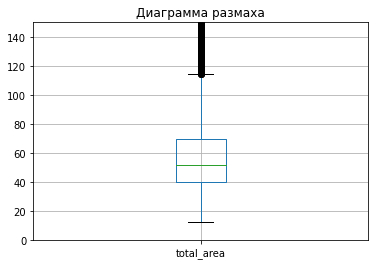

In [57]:
#по размаху видно, что значения в третьем квартиле не более 69 м2, ограничим диаграмму 150 м2
df.boxplot(column='total_area')
plt.title('Диаграмма размаха')
plt.ylim(0, 150)
plt.show()

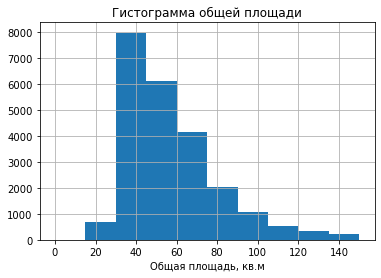

In [58]:
#построим гистограмму для объектов по параметру площадь
df['total_area'].hist(range=(0, 150))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.show()

In [59]:
#прсчитаем "порог" "средних" занчений
det_whiskers('total_area')[1]

114.5

In [60]:
#создадим переменную с "хорошими значениями"
#считаем, что можем отбрасить не более 5% от данных
good_large_area_quant = df['total_area'].quantile(.95)
good_large_area = df.query('total_area < @good_large_area_quant')

In [61]:
#изучим указанные ранее параметры посредством гистограмм
#сперва посмотрим размах данных
df['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

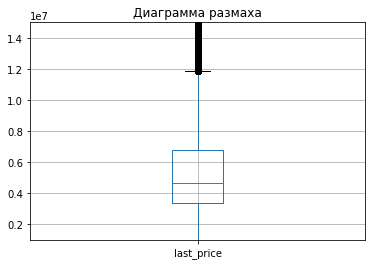

In [62]:
#построим диаграмму для объектов со стоимостью 1,0 млн до 15 млн 
df.boxplot(column='last_price',)
plt.title('Диаграмма размаха')
plt.ylim(1000000, 15000000)
plt.show()

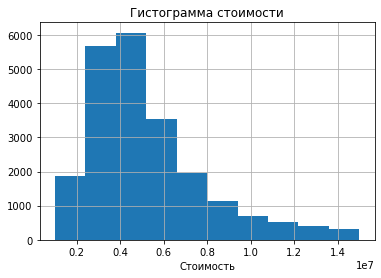

In [63]:
#построим диаграмму для объектов со стоимостью 1,0 млн до 15 млн 
df['last_price'].hist(range=(1000000, 15000000))
plt.title('Гистограмма стоимости')
plt.xlabel('Стоимость')
plt.show()

In [64]:
det_whiskers('last_price')[1]

11897500.0

In [65]:
#создадим переменную с "хорошими значениями"
#считаем, что можем отбрасить не более 5% от данных
good_last_price_quant = df['last_price'].quantile(.95)
good_price = df.query('last_price < @good_last_price_quant')

In [66]:
#изучим указанные ранее параметры посредством гистограмм
#сперва посмотрим размах данных
df['rooms'].describe()

count    23613.000000
mean         2.079363
std          1.066311
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

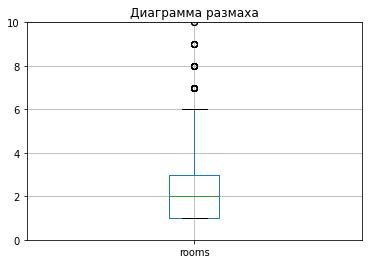

In [67]:
#по размаху видно, что значения в третьем квартиле не более 3
df.boxplot(column='rooms')
plt.title('Диаграмма размаха')
plt.ylim(0, 10)
plt.show()

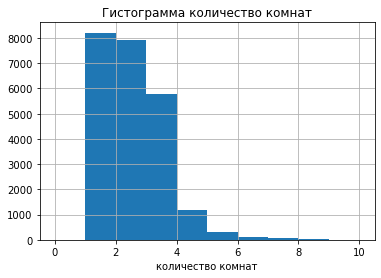

In [68]:
#построим диаграмму для объектов с количеством комнат до 10 
df['rooms'].hist(range=(0, 10))
plt.title('Гистограмма количество комнат')
plt.xlabel('количество комнат')
plt.show()

In [69]:
det_whiskers('rooms')[1]

6.0

In [70]:
#создадим переменную с "хорошими значениями"
good_many_rooms = good_price.query('rooms < 6')

In [71]:
df['ceiling_height'].describe()

count    23613.000000
mean         2.735913
std          0.996070
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

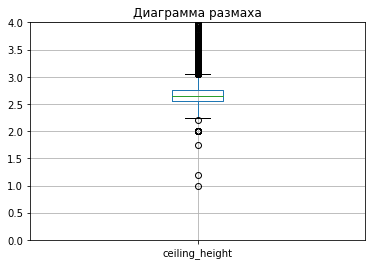

In [72]:
#по размаху видно, что значения в третьем квартиле не более 3
df.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха')
plt.ylim(0, 4)
plt.show()

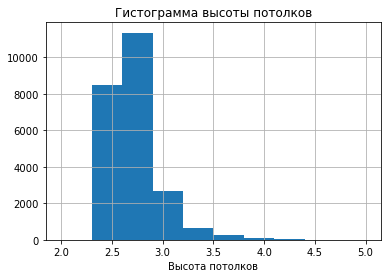

In [73]:
#построим диаграмму для объектов с высотой потолков от 2 до 5 м
df['ceiling_height'].hist(range=(2, 5), bins=10)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.show()

In [74]:
display(det_whiskers('ceiling_height')[1])
display(det_whiskers('ceiling_height')[0])

3.05

2.25

In [75]:
#создадим переменную с "хорошими значениями"
usual_ceiling = good_many_rooms.query('2.25 < ceiling_height < 3.05')

In [76]:
df['days_exposition'].describe()

count    23613.000000
mean       169.347690
std        206.485173
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

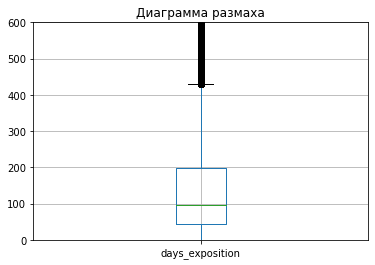

In [77]:
#по размаху видно, что значения в третьем квартиле не более 200 дней
df.boxplot(column='days_exposition')
plt.title('Диаграмма размаха')
plt.ylim(0, 600)
plt.show()

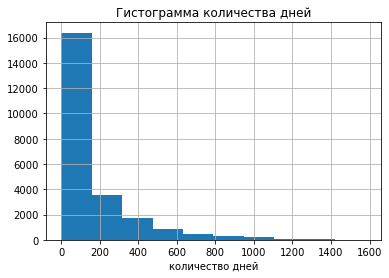

In [78]:
#построим диаграмму для объектов, объявление которых весело не более 500 дней
df['days_exposition'].hist()
plt.title('Гистограмма количества дней')
plt.xlabel('количество дней')
plt.show()

In [79]:
det_whiskers('days_exposition')[1]

430.0

In [80]:
#создадим переменную с "хорошими значениями"
good_day = usual_ceiling.query('30 < days_exposition < 430')

In [81]:
#создадим датафрейм с "хорошими значениями" для построение матрицы графиков
good_df = pd.DataFrame(good_day, columns=['total_area', 'last_price', 'rooms', 'ceiling_height'])

In [82]:
#отфильтруем исходные данные с целью получения "хороших данных"
good_data = df.query('total_area < 114 and last_price < 11897500 and rooms < 6 and 2.25 < ceiling_height < 3.05 and 30 < days_exposition < 430')

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.726533,0.788107,0.221183
last_price,0.726533,1.000000,0.453249,0.326839
rooms,0.788107,0.453249,1.000000,-0.002118
ceiling_height,0.221183,0.326839,-0.002118,1.000000


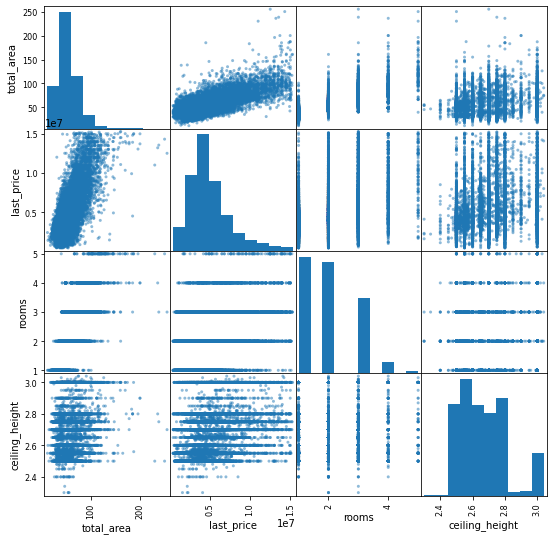

In [83]:
#построим матрицу графиков и рассчитаем корреляцию для параметров
pd.plotting.scatter_matrix(good_df, figsize=(9, 9))
good_df.corr()

Вывод:
* total_area: 
     - наибольшая связь с количеством комнат, что очевидно
     - наименьшая связь с высотой потолков
* last_price:
     - наибольшая связь с общей площадь, довольно очевидно
     - наименьшая связь с высотой потолков
* rooms:
     - наивысшая связь с общей площадбю, что очевидно
     - наименьшая связь, причем отрицательная, с высотой потолков (иными словами чем больше количество комнат, тем ниже потолки)

### Зависимость цены от площади квартиры и от расстояния до центра города

Text(0.5, 1.0, 'Площадь')

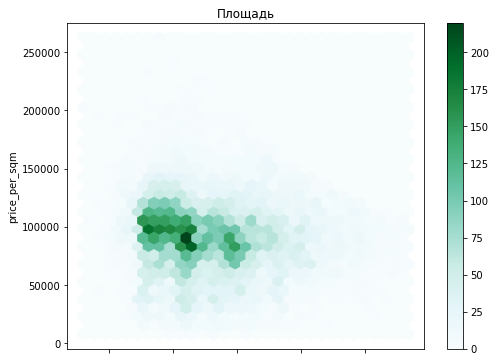

In [84]:
#построим график зависимости цены за м2 от площади
good_data.plot.hexbin(x='total_area', y='price_per_sqm', gridsize=30, figsize=(8,6)).set_title('Площадь')

Text(0.5, 1.0, 'Удаленность от центра')

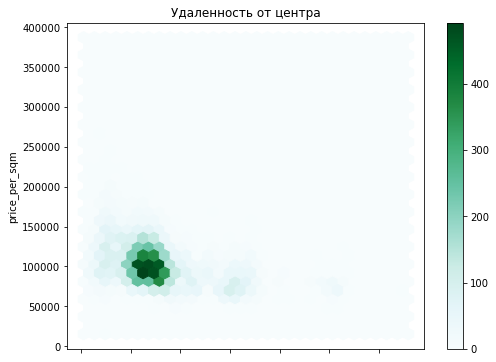

In [85]:
#построим график зависимости цены за м2 от удаленности от центра
good_day.plot.hexbin(x='city_centers_neares', y='price_per_sqm', gridsize=30, figsize=(8,6)).set_title('Удаленность от центра')

### Зависимость цены от числа комнат, этажа квартиры и времени публикации объявления

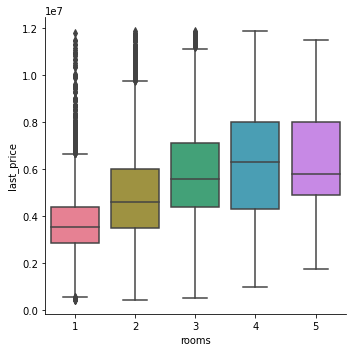

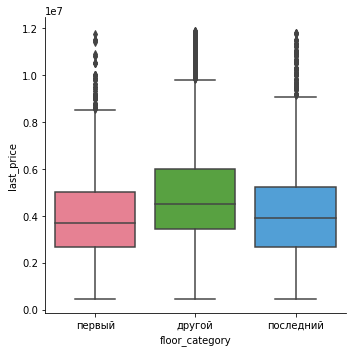

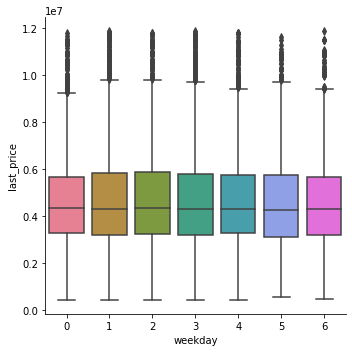

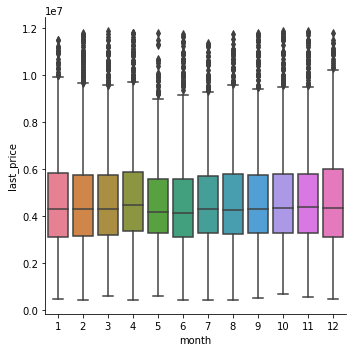

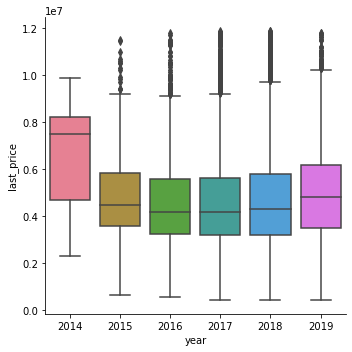

In [86]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data, palette='husl')

### Населенных пунктов с наибольшим числом объявлений

In [87]:
median_price_per_sqm = good_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'median'])
median_price_per_sqm.columns = ['count', 'median']
median_price_per_sqm.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,9223,102140.0
посёлок Мурино,361,85714.0
посёлок Шушары,329,76562.0
Всеволожск,311,65857.0
Пушкин,247,98471.0
посёлок Парголово,245,91040.0
Колпино,237,74324.0
Гатчина,226,67180.0
деревня Кудрово,211,92297.0


### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге

In [88]:
#создадим столбец удаленности от центра в км
good_data['city_centers_neares_km'] = (good_data['city_centers_neares'] / 1000).fillna(999999).astype('int') #к пропускам применим служебное значение
good_data.reset_index(inplace=True)
display(good_data['city_centers_neares_km'].head())

0        18
1         8
2    999999
3        19
4        11
Name: city_centers_neares_km, dtype: int32

In [89]:
# Код ревьюера

# Вот пример на массивах, но с df похожая ситуация может произойти
list_1 = [1, 2, 3]
list_2 = list_1
list_2[0] = 4

print('По идее list_1 не должен меняться, но list_1 =', list_1)

list_1 = [1, 2, 3]
list_2 = list_1.copy()
list_2[0] = 4

print('list_1 не изменился, list_1 =', list_1)

По идее list_1 не должен меняться, но list_1 = [4, 2, 3]
list_1 не изменился, list_1 = [1, 2, 3]


<AxesSubplot:xlabel='city_centers_neares_km'>

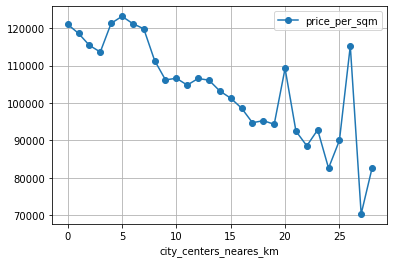

In [90]:
#построим график
pivot_table_km = good_data.query('locality_name == "Санкт-Петербург" and city_centers_neares_km !=999999').pivot_table(index='city_centers_neares_km', values = 'price_per_sqm', aggfunc='mean')
pivot_table_km.plot(marker='o', grid=True)

Видим, что резкий спад в диапазоне от 5 до 10 км.

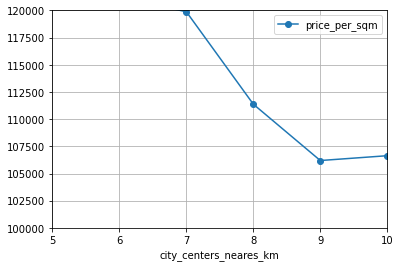

In [91]:
#увеличим масштаб отрезка
pivot_table_km = good_data.query('locality_name == "Санкт-Петербург" and city_centers_neares_km !=999999').pivot_table(index='city_centers_neares_km', values = 'price_per_sqm', aggfunc='mean')
pivot_table_km.plot(marker='o', grid=True)
plt.xlim(5, 10)
plt.ylim(100000, 120000)
plt.show()

Видим, что резкий спад стоимости квадратного метра находится на 7 км.

### Изучим центра СПБ

In [92]:
#создадим таблицу центра СПБ
center_spb_data = good_data.query('city_centers_neares_km <= 7 and locality_name == "Санкт-Петербург"')

### Изучим влияение количества комнат на стоимость м2

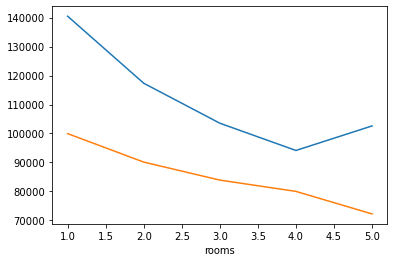

In [93]:
#построим график
center_spb_rooms = center_spb_data.groupby('rooms')['price_per_sqm'].median().plot()
good_data_rooms = good_data.groupby('rooms')['price_per_sqm'].median().plot()

Видим, что чем больше комнат, тем ниже стоимость м2
Синий цвет - значения в центре СПБ
Оранжевый - по всему региону

### Изучим влияние этажа на стоимость квадратного метра

,mean,count,median
floor_category,,,
первый,109344.147541,183,103333
последний,113650.932367,207,111111


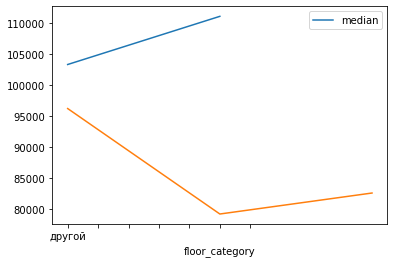

In [94]:
center_spb_floor_category = center_spb_data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
good_day_floor_cat = good_day.groupby('floor_category')['price_per_sqm'].median().plot()
center_spb_floor_category

Видим, что в центре СПБ чем выше этаж, тем дороже, в то время как во всем регионе обратная картина

### Зависимость стоимости квадратного метра от удаленности от центра.

0.05504499352336831

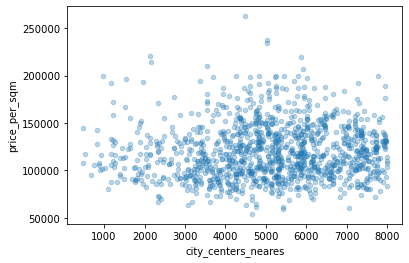

In [95]:
center_spb_data.plot(kind = 'scatter', y = 'price_per_sqm', x = 'city_centers_neares', alpha = 0.3)
center_spb_data['city_centers_neares'].corr(center_spb_data['price_per_sqm'])

Видим, что нет никакой зависимости, что ожидаемо, т.к. это значения центра 

-0.40193520445503944

<AxesSubplot:xlabel='city_centers_neares', ylabel='price_per_sqm'>

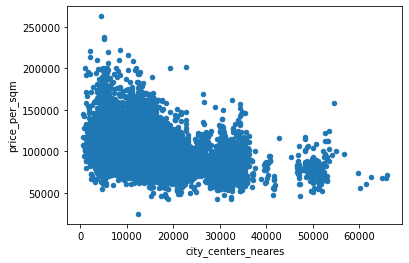

In [96]:
display(good_data['city_centers_neares'].corr(good_data['price_per_sqm']))

#построим график зависимости цены за м2 от площади
good_data.plot(x='city_centers_neares', y='price_per_sqm', kind='scatter')

Во все регионе видно, чем ближе к центру, тем выше стоимость, но заметим интересную вещь, что в 55 км от центра имеется скачок, скорей всего это элитное жилье

### Зависимость стоимости квадратного метра от дня недели размещения объявления

,mean,count,median
weekday,,,
5,123325.062500,112,121461.0
6,123122.146667,75,119767.0
3,119914.675105,237,116666.0
2,120977.454545,220,116041.5
4,119541.773756,221,115740.0
1,118804.020408,196,114443.0
0,117875.311828,186,113078.5


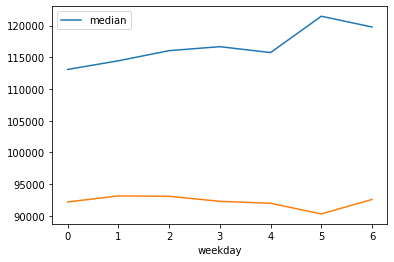

In [97]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index = 'weekday', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')
good_day_floor_cat = good_day.groupby('weekday')['price_per_sqm'].median().plot()
center_spb_weekday_exposition.sort_values('median', ascending = False)

Видим, что самые дорогие обявления жилья в центре СПБ в субботу. Думаю, что это связано с тем, что спрос больше, т.к. больше времени можно уделить поиску и соответсвенно если спрос растет, можно и подять стоимость.
Что касается всего региона, то там в целом день недели не имеет значения

### Зависимость стоимости квадратного метра от месяца недели размещения объявления

,mean,count,median
month,,,
3,129008.062016,129,130555.0
9,123921.273585,106,122262.5
2,120504.036496,137,118397.0
8,121593.037975,79,117450.0
4,118650.014706,136,115747.5
11,117584.403361,119,115625.0
10,116982.050420,119,113888.0
12,118005.055556,90,113731.5
5,123481.805195,77,113247.0


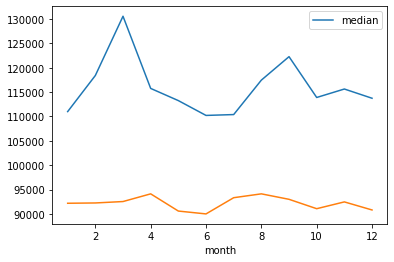

In [98]:
center_spb_month_exposition = center_spb_data.pivot_table(index = 'month', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')
good_day_floor_cat = good_day.groupby('month')['price_per_sqm'].median().plot()
center_spb_month_exposition.sort_values('median', ascending = False)

Видим, что только для объектов в центре существенен месяц, для остальных объектов по большому счету разницы нет в каком месяце.

### Зависимость стоимости квадратного метра от года размещения объявления.

,mean,count,median
year,,,
2019,130870.360902,133,130188.0
2018,123235.767442,430,120329.5
2017,117202.857143,483,112195.0
2016,113262.460606,165,108518.0
2015,111558.055556,36,102997.5


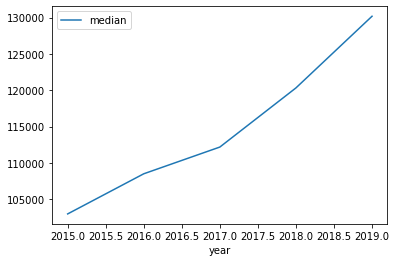

In [99]:
center_spb_month_exposition = center_spb_data.pivot_table(index = 'year', values = 'price_per_sqm', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')
center_spb_month_exposition.sort_values('median', ascending = False)

Видим, что стоимость м2 росла из года в год, что вполне очевидно

## Общий вывод

**Лирика:**

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.

Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 30 до 430 дней, где до 30 дней считаем, что это быстрая продажа, а более 464 дня - долгая. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 7 километров.

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать! Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в радиусе 7 км в центре СПБ.